# Instruction on Mathematical Programming in Python for COMP24112

Disclaimer: This is *not* a tutorial for complete beginners in Python. It assumes you already know the language at a very basic level. You should go through the official introductory tutorial first (https://docs.python.org/3/tutorial/introduction.html), if you haven't already. You can use the following cell as an interactive console to learn hands-on, although we recommend you to use Spyder's one.

In [11]:
# Write your code here

# Table of Contents

* [Control structures](#sec1)
* [Matrix programming](#sec2)
 * [Creating vectors and matrices](#sec2.1:create)
 * [Accessing elements of arrays](#sec2.2:access)
 * [Creating random matrices](#sec2.3:random)
 * [Matrix attributes and functions](#sec2.4:attr)
 * [Operators on matrices](#sec2.5:operators)
* [Plotting](#sec3)

# <a id='sec1'> 1. Control structures </a>

We will show the basics constructs for control flow in Python. If you want to know more we redirect you to the official guide: https://docs.python.org/3/tutorial/controlflow.html.

## If

In [20]:
x = 5

if x < 10:
    print('Less than 10.')
    
if x < 10:
    print('Less than 10.')
else:
    print('At least 10.')
    
if x < 10:
    print('Less than 10.')
elif x < 20:
    print('Less than 20.')
elif x < 30:
    print('Less than 30.')
else:
    print('At least 30.')

Less than 10.
Less than 10.
Less than 10.


## For

In [13]:
for i in range(5):  # Note how 5 is excluded
    print(i, end=' ')
print()
    
for i in range(3, 7):  # Again, 7 is excluded
    print(i, end=' ')
print()
    
for i in range(3, 12, 2):  # Step 2
    print(i, end=' ')
print()

for i in range(5):
    if i > 2:
        break
    print(i, end=' ')
print()
    
for i in range(5):
    if i > 7:  # This will never occur.
        break
    print(i, end=' ')
else:  # Python allows an `else` clause to the for loop that is executed when no `break` occurred.
    print('Went through the whole loop!')
print()

0 1 2 3 4 
3 4 5 6 
3 5 7 9 11 
0 1 2 
0 1 2 3 4 Went through the whole loop!



# User-defined functions

Defining functions for code reuse and structure is of primary importance. Generally, copy-pasting code signals that you should probably write a function instead. Here are the most common, yet most useful, ways of defining a function in Python.

In [14]:
def my_function():
    # Write your code here
    print('This function is not very useful.')

my_function()

This function is not very useful.


In [15]:
def my_sum(a, b):
    s = a + b
    return s

print(my_sum(5, 9))

14


In [16]:
def division_and_reminder(a, b):
    d = a // b  # `//` is the integer division operator
    r = a % b  # `%` is the modulo operator
    return d, r

d, r = division_and_reminder(13, 3)
print(d, r)

4 1


In [17]:
def exp(x, base=10):  # You can assign values as defaults
    return base ** x

print(exp(2))
print(exp(2, base=3))

100
9


# <a id='sec2'> 2. Matrix programming</a>

A matrix is a rectangular array of numbers, like a two-dimensional array in C or JAVA. An ''$n$ by $m$"  (or $n\times m$) matrix has $n$ rows and $m$ columns. Special meaning is sometimes attached to 1 by 1 matrices, which are called ''scalars'' (ordinary numbers, basically), and to matrices with only one row or only one column, which are called ''vectors''.

In Python, the most common way of dealing with matrices is using NumPy's arrays. They represent multi-dimensional arrays of a fixed size. This means that they can be used to represent scalars (0D), vectors (1D), matrices (2D) and even higher-order arrays (but you will not need to use them in this course).

First of all, we must include NumPy.

In [18]:
import numpy as np

## <a id='sec2.1:create'> 2.1 Creating vectors and matrices </a>

To manually instantiate a vector in NumPy use the following syntax:

In [19]:
a = np.array([1, 10, 100])
print(a)

[  1  10 100]


If you have gone through the Python introductory tutorial (as you should), you have probably realised that we have called the `np.array()` function by passing a list as an argument. This is why the sequence of number is delimited by brackets \[ \] and elements are separated by a comma.

To define a matrix you can run:

In [ ]:
A = np.array([[0, 1, 2],
              [3, 4, 5]
             ]) 
# Note: new lines are not important here. We could write: np.array([[0, 1, 2], [3, 4, 5]]).
print(A)

We are instantiating a list of lists first, and then passing it as an argument to `np.array()`. Each of the inner lists defines a row. Note that each row *must* have the same number of elements, otherwise the resulting object will not be a matrix:

In [ ]:
# THIS IS WRONG!
print(np.array([[0, 1, 2],
                [3, 4]
               ]))

However, you will rarely need to define a vector or a matrix manually. Most of the time you will use one of the built-in functions to create specific types of arrays:

In [ ]:
range_v = np.arange(10)  # Array of integers from 0 to 9
print(range_v)

In [ ]:
X = np.zeros([3, 3]) # 2x3 matrix full of zeros
print(X)

In [ ]:
y = np.ones(5)  # array of length 4 full of ones
print(y)

In [ ]:
I  = np.eye(5, dtype=int)  # 3x3 identity matrix
print(I)

There are a few things to note here. First, the shape must be passed as a list in order to create a matrix: `np.zeros(2, 3)` would return an error. On the other hand, for a vector you can pass a single scalar to represent the length, as we did in `y = np.ones(4)`. Second, the default data type is float. In previous examples the resulting arrays where integers because NumPy automatically inferred it from the constants we used. Compare these:

In [ ]:
int_vector = np.array([0, 1, 2])  # All constants are integers.
print(int_vector)

In [ ]:
float_vector = np.array([0, 1, 2])  # All constants are floats. Note: "1." is the same as "1.0" in Python.
print(float_vector)

In [ ]:
another_float_vector = np.array([0, 1.7, 2])  # Integers are converted to floats when mixed.
print(another_float_vector)

To force NumPy to use integers you can use the keyword argument `dtype`:

In [ ]:
y_float = np.ones(4)
print(y_float)

In [ ]:
y_int = np.ones(4, dtype=int)
print(y_int)

Finally, `np.zeros()` and `np.ones()` have their counterparts that create an array copying dimensions and data type from an existing one:

In [ ]:
z = np.zeros_like(y_int,dtype=float)  # y_int was defined previously as an array of integers of length 4, so z is too.
print(z)

In [ ]:
Y = np.ones_like(X)  # X was a 2x3 matrix of zeros.
print(Y)

## <a id='sec2.2:access'> 2.2 Accessing elements of arrays </a>

You can access elements of a NumPy array exactly like you would with a list or string:

In [ ]:
a = np.array([5, 50, 500])
print(a[0], a[1], a[2], a[-1])

For matrices you can do the same, but it's much clearer and more convenient to use NumPy indexing:

In [ ]:
A = np.array([[0, 1, 2],
              [3, 4, 5]
             ])
print(A[0][0], A[0][2], A[1][-2])  # List indexing. You should not use this.
print(A[0, 0], A[0, 2], A[1, -2])  # NumPy indexing. Use this.

You can use the syntax `start:stop` to select a part of a matrix. Note that `start` is included, while `stop` is **excluded**. This is the same as Python's slicing that you have seen in the tutorial.

In [ ]:
B = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]
             ])
print(B[0:2, 1:3])

If you omit `start`, Python will start from the beginning. If you omit `stop`, it will continue until the end. If you omit both, it will do both, thus selecting everything.

In [ ]:
print(B[:2, 1:3])  # Note: this is the same as before, because 0 is the starting value.

In [ ]:
print(B[:2, 1:])

In [ ]:
print(B[:2, :])

You can also use negative indices, as usual:

In [ ]:
# These are the same because 3 is the last column index.
print(B[:2, :3])
print(B[:2, :-1])

You can also specify a step by using the `start:stop:step` syntax, if you want non-unit spacing (note that `step` is the last element!):

In [ ]:
C = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7],
              [ 8,  9, 10, 11, 12, 13, 14, 15]
             ])
print(C[:, ::2])
print(C[:, 1:6:2])

If you use a negative step you go backwards:

In [ ]:
print(C[:, ::-1])  # From last element to first

In [ ]:
print(C[:, ::-2])  # Same as above, but with step two

In [ ]:
print(C[:, 6:2:-2])  # Also specify start and end

You can also use lists or other arrays of integers to index.

In [ ]:
print(B)
print(B[0::2, :])  # Even numbered rows.
print(B[[0, 2], :])  # Rows 0 and 2. Since matrix B has 3 rows, this is effectively the same as above.
row_inds = np.array([0, 2])
print(B[row_inds, :])  # NumPy arrays work as well.

Note that NumPy supports a more advanced way of indexing, that allows you to use matrices as indices as well. The example below shows one example where advanced indexing is useful. You can read more about it on the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

In [ ]:
a = np.array([5, 50, 500])  # `a` is the array that contains the values we are interested in.
I = np.array([[0, 1, 2], [2, 0, 1]])  # `I` is a 2x3 matrix containing indices over array `a`.

# `R` is a 2x3 matrix (same shape as `I`) containing elements taken from array `a`.
#  For example, R[0, 1] is defined as a[I[0, 1]].
R = a[I]

print(a)
print(I)
print("----")
#print(R)
print(a[np.array([[0,1,2],[2,0,1]])])

## <a id='sec2.3:random'> 2.3 Creating random matrices </a>

In Python there are two common ways of dealing with randomness: use the standard `random` library or NumPy's one.

In [ ]:
import random  # Standard library
print(random.random())

In [ ]:
# Now we use NumPy's random library.
print(np.random.rand())

It is generally more convenient to use NumPy because it makes it easier to create and handle random vectors and matrices.

We just used `np.random.rand()` without arguments and saw that it returns a single scalar. We can use it to create vectors or matrices as well:

In [ ]:
print(np.random.rand(5))  # vector of length 5

In [ ]:
print(np.random.rand(3, 3))  # 2x3 matrix

`np.random.rand()` samples from a uniform distribution over $[0, 1)$. You can use `np.random.randn()` to sample from a standard normal/Gaussian distribution instead:

In [ ]:
print(np.random.randn(2, 3))

For integers you can use `np.random.randint()`. There are a few ways of calling it:

In [ ]:
print(np.random.randint(5))  # Single integer in [0, 5).
print(np.random.randint(0,5))  # Single integer in [3, 10).
print(np.random.randint(6, size=10))  # Vector of length 10 with integers in [0, 6).
print(np.random.randint(3, 10, size=[3, 4]))  # 3x4 matrix of integers in [3, 10).

To perform permutations you can use `np.random.permutation()`. You can use it in two ways:

In [ ]:
print(np.random.permutation(3))  # Random permutation of [0, 1, 2, 3]

In [ ]:
print(np.random.permutation([93, 2, 1919, -38]))  # Random permutation of the input list.

You can select just some elements of the result if you want a sample:

In [ ]:
# Sample 4 different numbers in [0, 10).
rnd = np.random.permutation(10)
print(rnd[0:12:1])

## <a id='sec2.4:attr'> 2.4 Matrix attributes and functions </a>

NumPy arrays have quite a few useful attributes.

### Data type

In [ ]:
y_float = np.ones(4)
print(y_float.dtype)
y_int = np.ones(4, dtype=int)
print(y_int.dtype)

### Shape and size

In [21]:
A = np.array([[0, 1, 2],
              [3, 4, 5]
             ])
print(A.shape)  # Get all dimensions.
print(A.shape[0])  # Get only the first dimension.
print(A.size)  # This is the number of elements in the matrix, i.e., the product of its dimensions.

(2, 3)
2
6


Please note that, in NumPy, vectors are **NOT** exactly equivalent to matrices with a dimension equal to one.

In [22]:
a = np.array([0, 1, 2])
print(a.shape)
b = np.array([[0, 1, 2]])  # Note the double brackets.
print(b.shape)

(3,)
(1, 3)


### Transposition

In [26]:
print(A.shape)
print(A.T.shape)

(2, 3)
(3, 2)


For vectors, transposition only makes sense with 2-dimensional ones:

In [ ]:
print(a)
print(a.T)  # This is exactly the same.
print(b)
print(b.T)  # This is not!

### Diagonals

In [ ]:
I = np.eye(4)
print(I)
print(I.diagonal())
print(np.diag(I))  # Alternative way

`np.diag()` can also be used to construct a diagonal matrix, like in Matlab:

In [ ]:
D = np.diag([1, 2, 4, 8])

print(D)

### Computation functions

In [ ]:
B = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]
             ])
print(np.min(np.random.permutation(4)))

In [ ]:
print(np.max(B))

In [ ]:
print(np.sum(B))
print(B)
print(B[:,0:3])
print(np.linalg.inv(B[:,0:3]))

In [ ]:
print(np.mean(B,axis=0))

Note that all of these can be called with the keyword argument `axis` to perform the computation along the given axis instead of over the whole matrix. Using `np.sum()` as an example:

In [ ]:
print(np.sum(B, axis=0))  # Over rows, i.e., compute the sum of each column.

In [ ]:
print(np.sum(B, axis=1))  # Same, but over columns.

### Other useful functions

In [ ]:
# Inverse
print(D)
print(np.linalg.inv(D))

In [ ]:
# Elementwise square root
print(np.sqrt(B))

In [ ]:
# Sort
R = np.random.randint(10, size=[3, 5])
print(R)
print(np.sort(R, axis=0))  # Over rows, so it sorts each column.

## <a id='sec2.5:operators'> 2.5 Operators on matrices </a>

NumPy array support most Python arithmetic and logic operators. We will show the most useful using these two matrices:

In [30]:
M = np.array([[ 1,  2,  3,  4],
              [ 5,  6,  7,  8],
              [ 9, 10, 11, 12],
              [13, 14, 15, 16],
             ])
D = np.diag([1, 2, 4, 8])
D

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 8]])

### Arithmetic operators

Standard arithmetic operators still work on NumPy arrays in a _component-by-component_ or _element-by-element_ fashion:

In [ ]:
print(D)
print(M)

print(D + M)

In [ ]:
print(D - M)

In [ ]:
print(D * M)

In [ ]:
print(D / M)

Please note the automatic casting to float when necessary, in the division just performed.

In [ ]:
print(D ** 2)  # Square. ** is Python's power operator.

Note that `**` can be used as an alternative method to perform the square root:

In [ ]:
print(D ** 0.5)

### Logical operators

Logical operators also work component-by-component:

In [ ]:
print(D > M)  # All other comparison operator such as <, <=, ==, >= and != work as well.

In [ ]:
print(D > 2)

In [ ]:
print(M > 10)

In [ ]:
# Logical AND
print((D > 2) & (M > 10))  # Parentheses are important here!

In [ ]:
# Logical OR
print((D > 2) | (M > 10))

In [ ]:
# Logical NOT
print(~(D > 2))  # Obviously, in this case we could have written `D <= 2`.

# Note that you should **never** use the `==` operator to compare floats or array of floats (Python or in any other language). Use NumPy's `allclose()` instead:

In [ ]:
print((.1 + .2) == .3)
print(np.allclose(.1 + .2, .3))

### Matrix multiplication is done with @

In [ ]:
print(D)

In [ ]:
print(M)

In [ ]:
print(D @ M)

In [ ]:
print(M @ D)  # Remember that matrix multiplication is not commutative!

When multiplying a matrix with a vector (remember, vectors only have one dimension), NumPy automatically treats it as a column or row vector as appropriate:

In [35]:
v = np.array([1, 2, 3, 4])
print(M)
print(v)
print(M @ v)
"""
its doing 
1 * 1 + 2 * 2 + 3 * 3 + 4 * 4
+
1 * 5 + 2 * 6 + 3 * 7 + 4 * 8
+
1 * 9 + 2 * 10 + 3 * 11 + 4 * 12
etc
"""

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[1 2 3 4]
[ 30  70 110 150]


'\nits doing \n1 * 1 + 2 * 2 + 3 * 3 + 4 * 4\n+\n1 * 5 + 2 * 6 + 3 * 7 + 4 * 8\n+\n1 * 9 + 2 * 10 + 3 * 11 + 4 * 12\netc\n'

In [36]:
print(v @ M)

[ 90 100 110 120]


Compare it with the following:

In [33]:
v_row = np.array([[1, 2, 3, 4]])
print(v_row @ M)  # This is the same...
#print(M @ v_row)  # ... but this raises an error!

[[ 90 100 110 120]]


Matrix multiplication can be also used to compute the dot product between two vectors:

In [37]:
u = np.array([10, 20, 30, 40])
print(u @ v)

300


### Concatenating

You can concatenate multiple vectors using the function `np.concatenate()`:

In [38]:
print(v)
vv = np.concatenate([v, v])
print(vv)
print(np.concatenate([v, v, v]))  # You can concatenate as many arrays as you want.

[1 2 3 4]
[1 2 3 4 1 2 3 4]
[1 2 3 4 1 2 3 4 1 2 3 4]


This also works on matrices:

In [39]:
print(D)
print(np.concatenate([D, D]))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]]


You may have notices that the default behaviour is concatenating over the first dimension, which for matrix means along rows. You can change it through the keyword `axis`:

In [ ]:
print(np.concatenate([D, D], axis=0))  # This is the default behaviour, i.e., the same as above.
print(np.concatenate([D, D], axis=1))  # This concatenates along columns instead.

You can also concatenate matrix and vectors, as long as it makes sense:

In [ ]:
Dt = D[0,0:4]
print(v_row.shape, Dt.shape)
print(np.concatenate([v_row, Dt], axis=0))  # This works.
print(np.concatenate([v_row, Dt[:, 0]], axis=1))  # This doesn't.

However, you cannot concatenate a 1-dimensional vector with a matrix:

In [ ]:
print(v.shape, D.shape)
#print(np.concatenate([v, D], axis=0))  # This raises an error.

### Broadcasting

Broadcasting is a handy feature of NumPy that relaxes shape constraints. The simplest case of broadcasting is using a constant with a binary matrix operator:

In [40]:
print(D)
print(D + 5)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]]
[[ 6  5  5  5]
 [ 5  7  5  5]
 [ 5  5  9  5]
 [ 5  5  5 13]]


As you can see, the constant is added to every element of the matrix and you don't need to create a 4$\times$4 matrix full of 5 to get the same result.

Broadcasting also applies to dimensions of size 1. For example:

In [41]:
print(v_row)
print(D)
print(D.shape, v_row.shape)
print(D + v_row)

[[1 2 3 4]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]]
(4, 4) (1, 4)
[[ 2  2  3  4]
 [ 1  4  3  4]
 [ 1  2  7  4]
 [ 1  2  3 12]]


Since vector `v_row` was added to the 4$ \times $4 matrix `D` has been implicitly expanded to a 4$ \times $4 matrix by duplicating it across dimension 0, which has size 1. If you want to check the result explicitly you can do:

In [51]:
print(D.shape)
print(np.broadcast_to(v_row, (3,4)))

(4, 4)
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


When broadcasting to a higher dimension, empty dimensions will be *prepended* to the array. For instance, adding a vector with shape `(n,)` to a two-dimensional matrix is the same as adding a (row) vector with shape `(1, n)` - note that this will be broadcast differently from a (column) vector with shape `(n, 1)`! This also means that a vector with shape `(n,)` can be broadcast to `(m, n)` but not to `(n, m)`.

Consider for example:

In [53]:
print(v)
print(D)
print(v.shape)
print(D + v)

[1 2 3 4]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]]
(4,)
[[ 2  2  3  4]
 [ 1  4  3  4]
 [ 1  2  7  4]
 [ 1  2  3 12]]


Thus, you need to be careful when doing this. You might mess up when dealing with column vectors:

In [ ]:
print(D + v_row)  # Adding a row vector
print(D + v_row.T)  # Adding a column vector. The result is different.
print()
print(D + v)  # Adding a 1-dimensional vector. It is treated as a row vector.
print(D + v.T)  # Still adding a 1-dimensional vector!

### Adding and removing dimensions

NumPy allows you to easily expand an array by adding dimensions of size 1:

In [61]:
print(v.shape)

v_exp_row = v[None, :]  # Add dimension 0.
print(v_exp_row.shape)
print(v_exp_row)  # Content is the same.

v_exp_column = v[:, None, None, None]  # Add dimension 1.
print(v_exp_column.shape)
print(v_exp_column)

(4,)
(1, 4)
[[1 2 3 4]]
(4, 1, 1, 1)
[[[[1]]]


 [[[2]]]


 [[[3]]]


 [[[4]]]]


This is mostly useful to 1) avoid mistakes when broadcasting and 2) concatenating:

In [62]:
#print(np.concatenate([v, D], axis=0))  # This raises an error.
print(np.concatenate([v[None, :], D], axis=0))  # This works.

[[1 2 3 4]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 8]]


You can remove dimensions of size 1 by using the `squeeze` function:

In [63]:
print(v_row.shape)
v_row_reduced = np.squeeze(v_row)
print(v_row_reduced.shape)
print(v_row_reduced)  # Content is the same.

(1, 4)
(4,)
[1 2 3 4]


# <a id='sec3'> 3. Plotting </a>

The `matplotlib` library contains a range of useful functions for data visualisation.

In [65]:
from matplotlib import pyplot as plt

## Standard plot

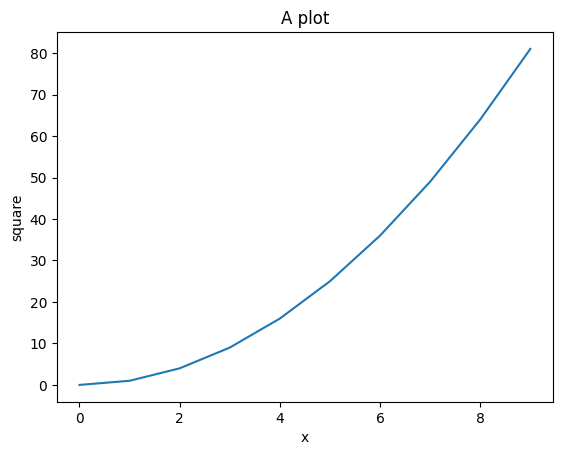

In [66]:
x = np.arange(10)
y = x ** 2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('square')
plt.title('A plot')
plt.show()

## Change plot style

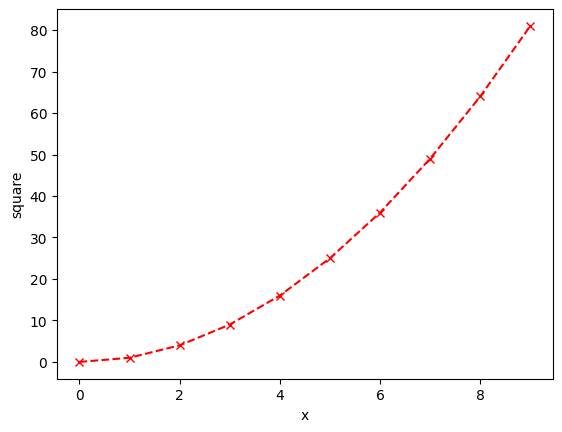

In [76]:
plt.plot(x, y, 'x--r')  # `r` stands for 'red', `--` means dashed line, `o` enables round markers.
plt.xlabel('x')
plt.ylabel('square')
plt.show()

You can find a comprehensive list of possible options in the [official documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) (scroll down a bit).

## Multiple plots

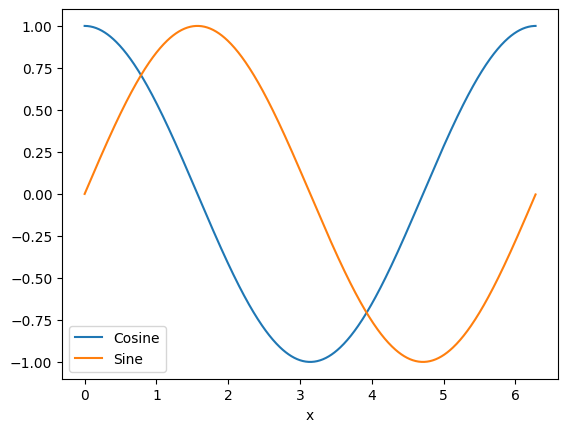

In [79]:
# In same figure. Note that Matplotlib automatically assigns different colours.
from math import pi
x = np.arange(0, 2*pi, 0.01)  # From 0 to 2pi with step 0.01.
y_cos = np.cos(x)
plt.plot(x, y_cos, label='Cosine')

y_sin = np.sin(x)
plt.plot(x, y_sin, label='Sine')

plt.xlabel('x')
plt.legend()

plt.show()

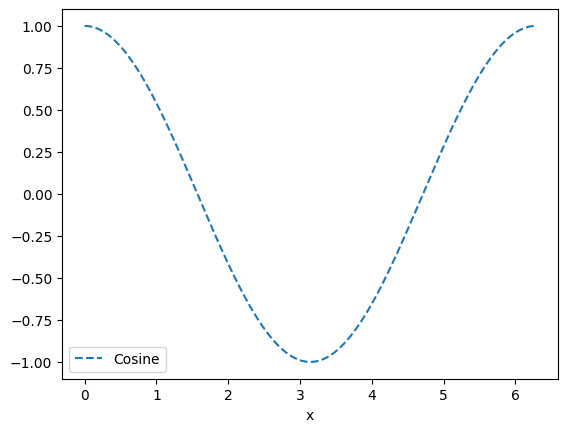

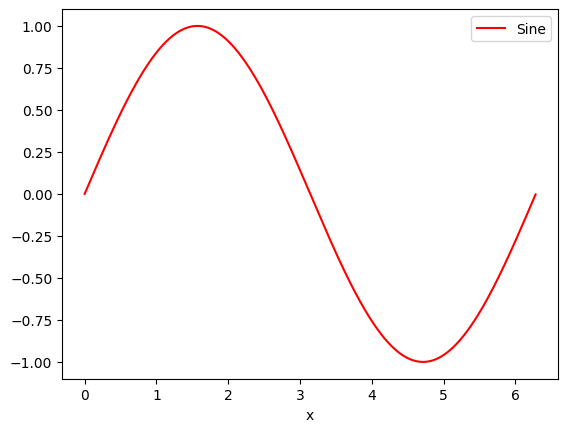

In [93]:
# In different figures
plt.plot(x, y_cos, '--', label='Cosine')
plt.xlabel('x')
plt.legend()

plt.figure()

plt.plot(x, y_sin, 'r', label='Sine')
plt.xlabel('x')
plt.legend()

plt.show()

## Error bars

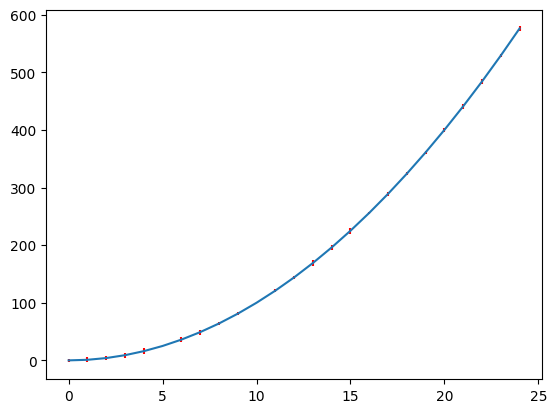

In [107]:
x = np.arange(0, 25, 1)
y = x ** 2
y_err = np.random.rand(y.size) * 5  # A vector of random numbers in [0, 5) with the same length as y
plt.errorbar(x, y, yerr=y_err, ecolor='r')
plt.show()